#Clasificador de piezas pintadas según la cantidad de material que se le aplica

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Todas las piezas

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MiguelCorona55/Proyecto-Machine-Learning/main/evaluacion.csv')

In [ ]:
df.head()

,Color_ID,Fecha,Label_ID,Skid,Job_ID,Product_ID,Primer_ID,Clear_ID,Resin_R1_PR,Resin_R2_PR,Hardener_R1_PR,Hardener_R2_PR,Resin_R1_BC,Resin_R2_BC,Resin_R3_BC,Resin_R4_BC,Resin_R5_BC,Resin_R6_BC,Resin_R1_CC,Resin_R2_CC,Resin_R3_CC,Resin_R4_CC,Hardener_R1_CC,Hardener_R2_CC,Hardener_R3_CC,Hardener_R4_CC,CO21,CO22,Week,Year,JobName,ColorName,Evaluacion
0,1,2021-02-02 18:31:37,1648530,34,29,590,1,1,229,229,22,22,134,132,131,137,176,171,110,106,102,107,49,49,49,49,27,30,5,2021,Difusor Tiguan,A1 Black Bic,0
1,1,2021-01-19 02:46:09,1632703,150,29,590,1,1,230,230,22,22,135,133,130,136,174,172,108,107,102,108,49,49,49,49,34,40,3,2021,Difusor Tiguan,A1 Black Bic,0
2,1,2021-01-25 20:31:44,1642661,189,29,590,1,1,228,231,22,22,134,132,131,137,176,174,110,107,102,108,49,49,49,49,27,30,4,2021,Difusor Tiguan,A1 Black Bic,0
3,1,2021-01-12 17:24:45,1626972,78,29,590,1,1,229,232,22,22,134,132,131,137,176,172,109,107,101,107,49,49,49,49,26,27,2,2021,Difusor Tiguan,A1 Black Bic,0
4,1,2021-01-13 00:41:23,1627305,149,29,590,1,1,228,228,22,22,135,132,131,136,175,173,107,107,103,107,49,49,46,49,29,31,2,2021,Difusor Tiguan,A1 Black Bic,0


In [ ]:
df_robots = df.loc[:,'Resin_R1_PR':'CO22']

In [ ]:
df_robots['Evaluacion'] = df['Evaluacion']

In [ ]:
df_robots.head()

,Resin_R1_PR,Resin_R2_PR,Hardener_R1_PR,Hardener_R2_PR,Resin_R1_BC,Resin_R2_BC,Resin_R3_BC,Resin_R4_BC,Resin_R5_BC,Resin_R6_BC,Resin_R1_CC,Resin_R2_CC,Resin_R3_CC,Resin_R4_CC,Hardener_R1_CC,Hardener_R2_CC,Hardener_R3_CC,Hardener_R4_CC,CO21,CO22,Evaluacion
0,229,229,22,22,134,132,131,137,176,171,110,106,102,107,49,49,49,49,27,30,0
1,230,230,22,22,135,133,130,136,174,172,108,107,102,108,49,49,49,49,34,40,0
2,228,231,22,22,134,132,131,137,176,174,110,107,102,108,49,49,49,49,27,30,0
3,229,232,22,22,134,132,131,137,176,172,109,107,101,107,49,49,49,49,26,27,0
4,228,228,22,22,135,132,131,136,175,173,107,107,103,107,49,49,46,49,29,31,0


In [ ]:
X = df_robots.loc[:,'Resin_R1_PR':'CO22']
y = df_robots['Evaluacion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Regresión Logistica

In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = lg.predict(X_test)

In [ ]:
score = lg.score(X_test, y_test)
score

0.9284984678243106

In [ ]:
lg.coef_

array([[ 6.47322034e-02, -3.82510402e-02,  1.30838856e-02,
         5.93157548e-03,  2.90395493e-03, -2.45123588e-02,
        -4.28055318e-02,  8.29593616e-02,  1.60826933e-02,
         3.14747454e-02,  1.67799919e-02,  7.20174307e-02,
         9.24751189e-02, -2.03965434e-01, -1.94541542e-01,
        -3.35565113e-02, -3.71774025e-02, -1.00384827e-01,
        -9.23581319e-05,  1.39045468e-02]])

In [ ]:
conf_matrix_lg = metrics.confusion_matrix(y_test, y_predict)
conf_matrix_lg

array([[902,   3],
       [ 67,   7]])

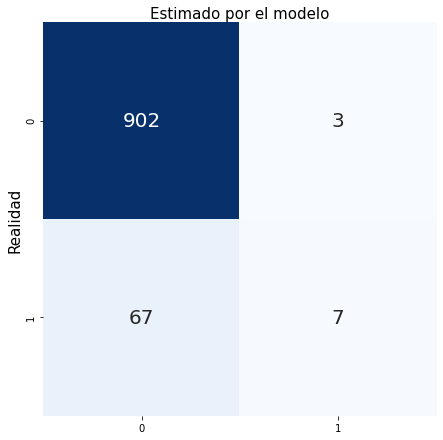

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix_lg), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       905
           1       0.70      0.09      0.17        74

    accuracy                           0.93       979
   macro avg       0.82      0.55      0.56       979
weighted avg       0.91      0.93      0.90       979



Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(X_test, y_test)

0.9489274770173647

In [ ]:
y_predict_forest = rf.predict(X_test)

In [ ]:
conf_matrix_forest  = metrics.confusion_matrix(y_test, y_predict_forest)
conf_matrix_forest

array([[897,   8],
       [ 42,  32]])

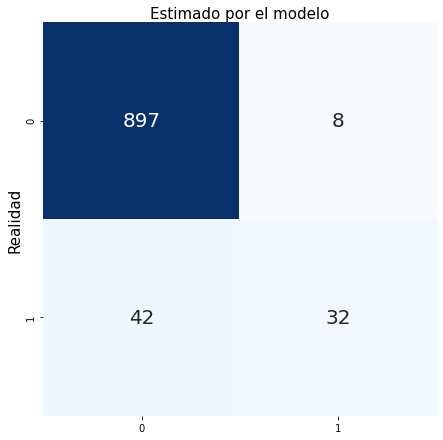

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix_forest), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(metrics.classification_report(y_test, y_predict_forest))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       905
           1       0.80      0.43      0.56        74

    accuracy                           0.95       979
   macro avg       0.88      0.71      0.77       979
weighted avg       0.94      0.95      0.94       979



Tiguan RR Temporal 2R Platinum grey

In [ ]:
df_robots_1 = df.loc[:,'Resin_R1_PR':'Evaluacion']

In [ ]:
df_robots_1 = df_robots_1[(df_robots_1["JobName"] == "Tiguan RR Temporal") & (df_robots_1["ColorName"] == "2R Platinum Grey")]

In [ ]:
df_robots_1 = df_robots_1.drop(columns = ["Week","Year","JobName","ColorName"])

In [ ]:
df_robots_1.head()

,Resin_R1_PR,Resin_R2_PR,Hardener_R1_PR,Hardener_R2_PR,Resin_R1_BC,Resin_R2_BC,Resin_R3_BC,Resin_R4_BC,Resin_R5_BC,Resin_R6_BC,Resin_R1_CC,Resin_R2_CC,Resin_R3_CC,Resin_R4_CC,Hardener_R1_CC,Hardener_R2_CC,Hardener_R3_CC,Hardener_R4_CC,CO21,CO22,Evaluacion
1531,212,213,20,20,88,92,167,167,330,318,82,74,136,154,39,33,66,73,56,59,0
1532,213,213,20,20,87,91,167,167,330,320,83,71,134,150,39,33,66,69,52,51,0
1533,213,212,20,20,86,92,167,166,331,321,106,101,136,153,49,49,66,73,55,59,0
1534,252,251,24,24,87,91,166,165,330,320,82,76,134,155,39,33,66,73,47,51,0
1535,214,213,20,20,88,91,167,167,329,321,81,72,137,153,39,33,66,73,57,59,0


In [ ]:
X = df_robots_1.loc[:,'Resin_R1_PR':'CO22']
y = df_robots_1['Evaluacion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Regresión Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = lg.predict(X_test)

In [ ]:
score = lg.score(X_test, y_test)
score

0.9521739130434783

In [ ]:
lg.coef_

array([[ 0.09980497,  0.03428869,  0.02036715,  0.00234719,  0.07770923,
         0.01721247, -0.13125665,  0.05631075,  0.4058963 , -0.50586882,
         0.06709527, -0.13717078,  0.33489247, -0.20216157, -0.38508035,
         0.31253639,  0.14442774, -0.22546358, -0.06199478,  0.01855946]])

In [ ]:
from sklearn import metrics

In [ ]:
conf_matrix_lg_1 = metrics.confusion_matrix(y_test, y_predict)
conf_matrix_lg_1

array([[214,   5],
       [  6,   5]])

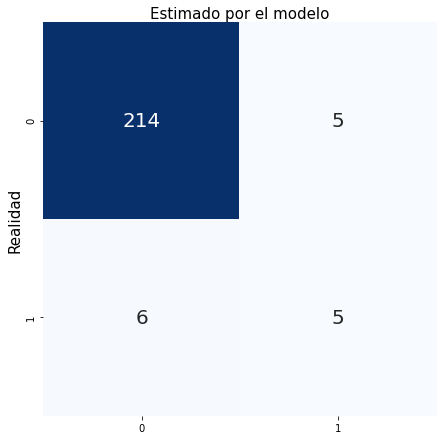

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix_lg_1), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       219
           1       0.50      0.45      0.48        11

    accuracy                           0.95       230
   macro avg       0.74      0.72      0.73       230
weighted avg       0.95      0.95      0.95       230



Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(X_test, y_test)

0.9695652173913043

In [ ]:
y_predict_forest = rf.predict(X_test)

In [ ]:
conf_matrix_forest_1  = metrics.confusion_matrix(y_test, y_predict_forest)
conf_matrix_forest_1

array([[217,   2],
       [  5,   6]])

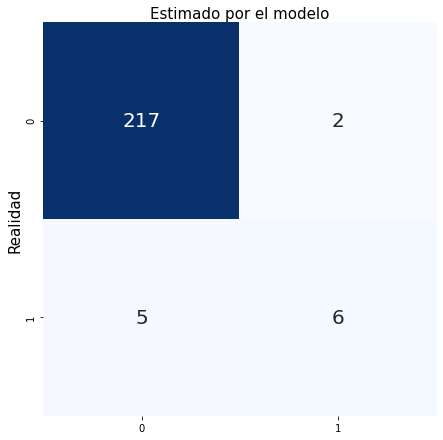

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix_forest_1), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(metrics.classification_report(y_test, y_predict_forest))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       219
           1       0.75      0.55      0.63        11

    accuracy                           0.97       230
   macro avg       0.86      0.77      0.81       230
weighted avg       0.97      0.97      0.97       230



Difusor Tiguan A1 Black Bic

In [ ]:
df_robots_2 = df.loc[:,'Resin_R1_PR':'Evaluacion']

In [ ]:
df_robots_2 = df_robots_2[(df_robots_2["JobName"] == "Difusor Tiguan") & (df_robots_2["ColorName"] == "A1 Black Bic")]

In [ ]:
df_robots_2 = df_robots_2.drop(columns = ["Week","Year","JobName","ColorName"])

In [ ]:
df_robots_2.head()

,Resin_R1_PR,Resin_R2_PR,Hardener_R1_PR,Hardener_R2_PR,Resin_R1_BC,Resin_R2_BC,Resin_R3_BC,Resin_R4_BC,Resin_R5_BC,Resin_R6_BC,Resin_R1_CC,Resin_R2_CC,Resin_R3_CC,Resin_R4_CC,Hardener_R1_CC,Hardener_R2_CC,Hardener_R3_CC,Hardener_R4_CC,CO21,CO22,Evaluacion
0,229,229,22,22,134,132,131,137,176,171,110,106,102,107,49,49,49,49,27,30,0
1,230,230,22,22,135,133,130,136,174,172,108,107,102,108,49,49,49,49,34,40,0
2,228,231,22,22,134,132,131,137,176,174,110,107,102,108,49,49,49,49,27,30,0
3,229,232,22,22,134,132,131,137,176,172,109,107,101,107,49,49,49,49,26,27,0
4,228,228,22,22,135,132,131,136,175,173,107,107,103,107,49,49,46,49,29,31,0


In [ ]:
X = df_robots_2.loc[:,'Resin_R1_PR':'CO22']
y = df_robots_2['Evaluacion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Regresión logistica

In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = lg.predict(X_test)

In [ ]:
score = lg.score(X_test, y_test)
score

0.9537037037037037

In [ ]:
lg.coef_

array([[ 0.37852099, -0.15412846, -0.00696105, -0.01327085,  0.06146742,
         0.6124211 , -0.41491799, -1.31244854,  0.25190298,  0.16411327,
         0.36661847,  0.07104503,  0.83832256, -0.0749667 , -0.18882998,
        -0.23658643, -1.85460807, -0.01090657, -0.17238022,  0.01423245]])

In [ ]:
conf_matrix_lg_2 = metrics.confusion_matrix(y_test, y_predict)
conf_matrix_lg_2

array([[188,   5],
       [  5,  18]])

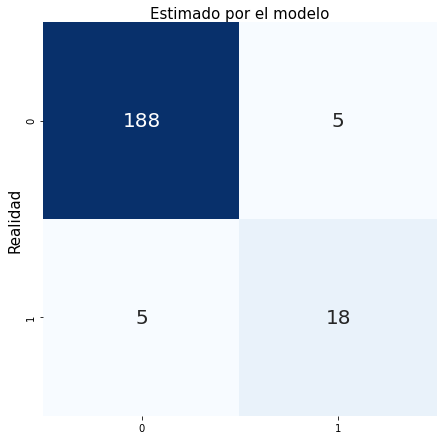

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix_lg_2), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       193
           1       0.78      0.78      0.78        23

    accuracy                           0.95       216
   macro avg       0.88      0.88      0.88       216
weighted avg       0.95      0.95      0.95       216



Random Forest 

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(X_test, y_test)

0.9629629629629629

In [ ]:
y_predict_forest = rf.predict(X_test)

In [ ]:
conf_matrix_forest_2  = metrics.confusion_matrix(y_test, y_predict_forest)
conf_matrix_forest_2

array([[191,   2],
       [  6,  17]])

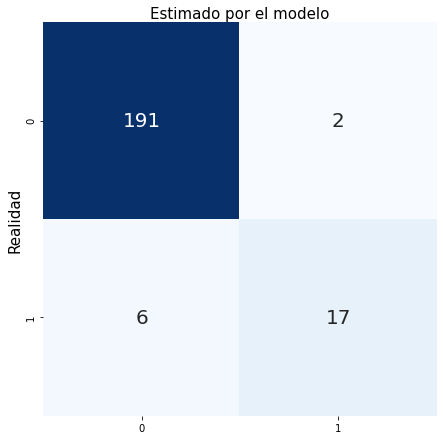

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix_forest_2), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(metrics.classification_report(y_test, y_predict_forest))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       193
           1       0.89      0.74      0.81        23

    accuracy                           0.96       216
   macro avg       0.93      0.86      0.89       216
weighted avg       0.96      0.96      0.96       216



RB Tiguan (Metallic) 2T Deep Black

In [ ]:
df_robots_3 = df.loc[:,'Resin_R1_PR':'Evaluacion']

In [ ]:
df_robots_3 = df_robots_3[(df_robots_3["JobName"] == "RB Tiguan (Metallic)") & (df_robots_3["ColorName"] == "2T Deep Black")]

In [ ]:
df_robots_3 = df_robots_3.drop(columns = ["Week","Year","JobName","ColorName"])

In [ ]:
df_robots_3.head()

,Resin_R1_PR,Resin_R2_PR,Hardener_R1_PR,Hardener_R2_PR,Resin_R1_BC,Resin_R2_BC,Resin_R3_BC,Resin_R4_BC,Resin_R5_BC,Resin_R6_BC,Resin_R1_CC,Resin_R2_CC,Resin_R3_CC,Resin_R4_CC,Hardener_R1_CC,Hardener_R2_CC,Hardener_R3_CC,Hardener_R4_CC,CO21,CO22,Evaluacion
2226,213,213,20,20,106,150,216,213,254,244,79,69,121,137,36,33,59,66,46,54,0
2227,213,214,20,20,111,97,216,214,249,242,72,70,123,139,33,33,56,66,47,47,0
2228,215,214,20,20,90,99,218,214,253,244,72,72,130,146,33,33,59,69,41,46,0
2229,213,213,20,20,91,99,216,213,254,245,72,72,129,147,33,33,59,69,42,48,0
2230,215,212,20,20,93,100,216,213,252,242,71,71,130,147,33,33,59,69,40,43,0


In [ ]:
X = df_robots_3.loc[:,'Resin_R1_PR':'CO22']
y = df_robots_3['Evaluacion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Regresión Logistica

In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = lg.predict(X_test)

In [ ]:
score = lg.score(X_test, y_test)
score

0.9467213114754098

In [ ]:
lg.coef_

array([[ 0.14075153, -0.02215398,  0.02649057,  0.01026419,  0.18234085,
        -0.08262043, -0.01160404,  0.05547842, -0.10412228,  0.01732589,
         0.12923007,  0.18153399, -0.08882999, -0.0165769 , -0.27534428,
        -0.35361478, -0.06686055, -0.15724334, -0.04926869,  0.04560493]])

In [ ]:
conf_matrix_lg_3 = metrics.confusion_matrix(y_test, y_predict)
conf_matrix_lg_3

array([[225,   5],
       [  8,   6]])

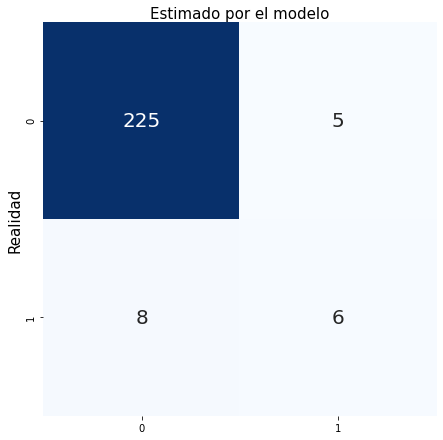

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix_lg_3), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       230
           1       0.55      0.43      0.48        14

    accuracy                           0.95       244
   macro avg       0.76      0.70      0.73       244
weighted avg       0.94      0.95      0.94       244



Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(X_test, y_test)

0.9713114754098361

In [ ]:
y_predict_forest = rf.predict(X_test)

In [ ]:
conf_matrix_forest_3  = metrics.confusion_matrix(y_test, y_predict_forest)
conf_matrix_forest_3

array([[228,   2],
       [  5,   9]])

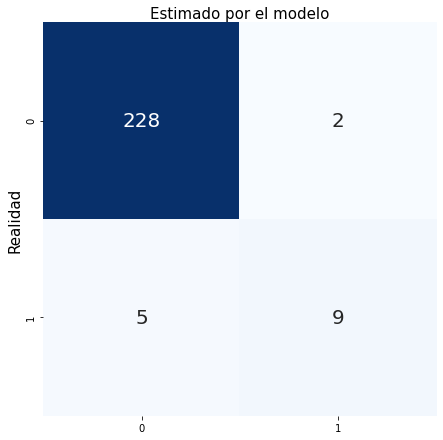

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix_forest_3), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(metrics.classification_report(y_test, y_predict_forest))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       230
           1       0.82      0.64      0.72        14

    accuracy                           0.97       244
   macro avg       0.90      0.82      0.85       244
weighted avg       0.97      0.97      0.97       244



RB Tiguan (Solid) 0Q Pure White

In [ ]:
df_robots_4 = df.loc[:,'Resin_R1_PR':'Evaluacion']

In [ ]:
df_robots_4 = df_robots_4[(df_robots_4["JobName"] == "RB Tiguan (Solid)") & (df_robots_4["ColorName"] == "0Q Pure White")]

In [ ]:
df_robots_4 = df_robots_4.drop(columns = ["Week","Year","JobName","ColorName"])

In [ ]:
df_robots_4.head()

,Resin_R1_PR,Resin_R2_PR,Hardener_R1_PR,Hardener_R2_PR,Resin_R1_BC,Resin_R2_BC,Resin_R3_BC,Resin_R4_BC,Resin_R5_BC,Resin_R6_BC,Resin_R1_CC,Resin_R2_CC,Resin_R3_CC,Resin_R4_CC,Hardener_R1_CC,Hardener_R2_CC,Hardener_R3_CC,Hardener_R4_CC,CO21,CO22,Evaluacion
653,213,213,20,20,106,113,198,214,223,227,83,81,149,154,36,39,69,73,43,46,0
654,216,212,20,20,106,114,197,217,224,229,85,87,154,161,39,39,73,79,55,64,0
655,213,214,20,20,106,115,197,216,223,229,87,86,154,162,39,39,73,76,56,61,0
656,214,212,20,20,107,112,197,215,223,227,83,81,149,150,36,39,69,73,43,46,0
657,213,212,20,20,105,113,196,213,225,227,83,81,147,152,36,39,69,73,60,62,0


In [ ]:
X = df_robots_4.loc[:,'Resin_R1_PR':'CO22']
y = df_robots_4['Evaluacion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Regresión Logistica

In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = lg.predict(X_test)

In [ ]:
score = lg.score(X_test, y_test)
score

0.9517241379310345

In [ ]:
lg.coef_

array([[ 3.41147240e-02,  2.03562234e-02, -5.63987799e-05,
         1.46018892e-03,  7.26543938e-02, -2.42362751e-02,
        -8.05051442e-02,  6.13412880e-02, -4.67949211e-02,
         1.60346114e-01,  8.47743387e-02, -1.74380062e-02,
        -6.38323350e-02,  2.51563444e-02, -1.39775788e-01,
        -1.02046644e-01, -1.74955593e-01, -3.36575343e-01,
         3.10352893e-02,  2.11766723e-03]])

In [ ]:
conf_matrix_lg_4 = metrics.confusion_matrix(y_test, y_predict)
conf_matrix_lg_4

array([[273,   1],
       [ 13,   3]])

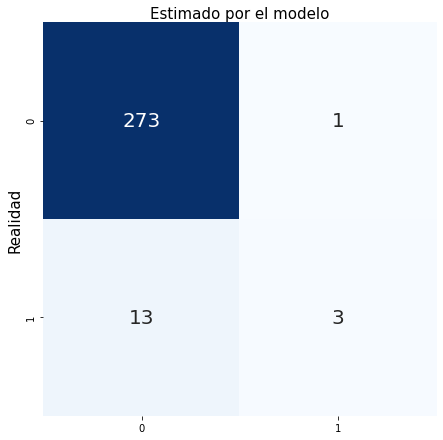

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix_lg_4), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       274
           1       0.75      0.19      0.30        16

    accuracy                           0.95       290
   macro avg       0.85      0.59      0.64       290
weighted avg       0.94      0.95      0.94       290



Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(X_test, y_test)

0.9551724137931035

In [ ]:
y_predict_forest = rf.predict(X_test)

In [ ]:
conf_matrix_forest_4  = metrics.confusion_matrix(y_test, y_predict_forest)
conf_matrix_forest_4

array([[272,   2],
       [ 11,   5]])

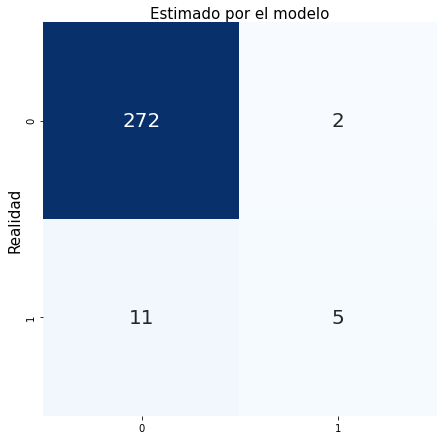

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_matrix_forest_4), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
print(metrics.classification_report(y_test, y_predict_forest))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       274
           1       0.71      0.31      0.43        16

    accuracy                           0.96       290
   macro avg       0.84      0.65      0.71       290
weighted avg       0.95      0.96      0.95       290

